# ODEs: Undamped pendulum

We are now going to investigate an undamped pendulum. The equations of motion for a pendulum with length $L$ and mass $m$ are:

$$
\frac{d^2\theta}{dt^2} = -\omega_0^2 \sin(\theta)
$$

where $\omega_0 = \sqrt{g/L}$ (with $g$ being the gravitational constant). 

For small oscillations, the analytic solution is

$$
\theta(t) = A \cos(\omega_0 t + \phi)
$$

where A and $\phi$ are set by initial conditions. For our purposes, we will have

$$\theta(t=0) = \theta_0$$

$$\omega(t=0) = 0 $$

so $A = \theta_0$ and $\phi = 0$, leading to the analytic solution

$$
\theta(t) = \theta_0 \cos(\omega_0 t)
$$


For all cases, it is insufficient to utilize the [Euler](https://en.wikipedia.org/wiki/Euler_method), [Euler-Cromer](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method), or [Midpoint](https://en.wikipedia.org/wiki/Midpoint_method) methods to achieve stable orbits. We will investigate the use of the [Verlet](https://en.wikipedia.org/wiki/Verlet_integration) scheme:

$$
\vec{v}_n = \frac{\vec{r}_{n+1} - \vec{r}_{n-1}}{2\tau} + \mathcal{O}(\tau^2)
$$

$$
\vec{x}_n = 2\vec{x}_n - \vec{x}_{n-1} + \tau^2 \vec{a}_n
$$

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import matplotlib.pyplot as plt
from odes import *

## Set constants

In [2]:
omega0 = 1.0

## Set initial conditions and initialize trajectory

In [3]:
method = b'Euler'
theta_init = 0.1
omega_init = 0.0

tau = 0.01
maxSteps = 10000
tmax = maxSteps * tau

t     = np.arange(0,tmax,tau)
theta = np.zeros(maxSteps)
omega = np.zeros(maxSteps)
alpha = np.zeros(maxSteps)
theta[0] = theta_init
omega[0] = omega_init

theta_true = theta_init * np.cos(omega0 * t)

## Define a "wrap" function when the pendulum turns over (for plotting)

In [4]:

def wrap_theta(theta):
    while theta > np.pi:
        theta -= 2 * np.pi
    while theta <= -np.pi:
        theta += 2*np.pi
    return theta

## Simulate the trajectory

In [5]:
state = np.zeros(3)
state[0] = theta_init    # angle
state[1] = omega_init    # angular velocity
state[2] = 0.            # angular acceleration

# Get the "last" state vector for Verlet scheme
# Using a step backward with the Euler scheme
state_old = np.zeros(3)
state_old[2] = -omega0**2 * np.sin(theta_init)
state_old[1] = omega_init
state_old[0] = theta_init - omega_init*tau + 0.5*tau**2*state_old[2]

for iStep in np.arange(1,maxSteps) :
    
    ti = t[iStep-1]
    state[2] = -omega0**2 * np.sin(state[0])
    if method == b'Euler':
        state = step_euler(tau,state)
    else :
        state = step_verlet(tau,state_old, state)

    theta[iStep] = wrap_theta(state[0])
    omega[iStep] = state[1]
    alpha[iStep] = state[2]
    

## Plot $\theta$ as a function of time

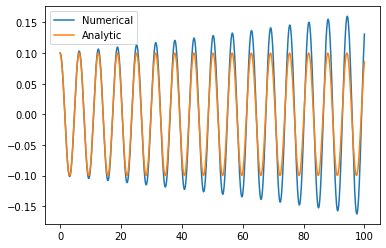

In [6]:
plt.plot(t,theta, label='Numerical')
plt.plot(t,theta_true, label='Analytic')
plt.legend()
plt.show()